In [1]:
from controller import Imager
import time
import cv2
import polanalyser as pa
from PIL import Image
import matplotlib.pyplot as plt
from mpldatacursor import datacursor
import numpy as np
import os

In [2]:
imager = Imager()

Found 5 devices
Devices IDs - ['101936', '101934', '101933', '101935', '192900073']


In [20]:
imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'
PIXELFORMATS = {'8':'Mono8','12':'Mono12Packed'}
PIXELFORMAT = PIXELFORMATS['8']
imager.update_params(ExposureTime=30000, PixelFormat=PIXELFORMAT)

In [21]:
imager._start_acquisitions()
# imager._stop_acquisitions()

In [5]:
directory = "try"
frames = 1
raw_images = []
for _ in range(frames):
    raw_images_, _ = imager.get_images(show_images=False, save_images=False, dir=directory)
    
#     for im in raw_images:
#         plt.imshow(im)
#         plt.show()

0 - 2021-10-13 14:12:25.925960 - 101936 captured Mono8 image 
0 - 2021-10-13 14:12:25.925960 - 101934 captured Mono8 image 
0 - 2021-10-13 14:12:25.926960 - 101933 captured Mono8 image 
0 - 2021-10-13 14:12:25.927961 - 101935 captured Mono8 image 
0 - 2021-10-13 14:12:25.928961 - 192900073 captured Mono8 image 
0 - 2021-10-13 14:12:25.932960 - 101936 captured Mono8 image 
0 - 2021-10-13 14:12:25.933959 - 101934 captured Mono8 image 
0 - 2021-10-13 14:12:26.323212 - 101933 captured Mono8 image 
0 - 2021-10-13 14:12:26.323212 - 101935 captured Mono8 image 
0 - 2021-10-13 14:12:26.354463 - 192900073 captured Mono8 image 
0 - 2021-10-13 14:12:26.370087 - 101936 captured Mono8 image 
0 - 2021-10-13 14:12:26.370087 - 101934 captured Mono8 image 
0 - 2021-10-13 14:12:26.370087 - 101933 captured Mono8 image 
0 - 2021-10-13 14:12:26.662184 - 101935 captured Mono8 image 
0 - 2021-10-13 14:12:26.662184 - 192900073 captured Mono8 image 
0 - 2021-10-13 14:12:26.677809 - 101936 captured Mono8 image 

In [24]:

raw_images, metadata = imager.capture_sequence(50, 0.3,0)

0 - 2021-10-13 15:58:23.189652 - 101936 captured Mono8 image 
0 - 2021-10-13 15:58:23.189652 - 101934 captured Mono8 image 
0 - 2021-10-13 15:58:23.220900 - 101933 captured Mono8 image 
0 - 2021-10-13 15:58:23.346019 - 101935 captured Mono8 image 
0 - 2021-10-13 15:58:23.347025 - 192900073 captured Mono8 image 
1 - 2021-10-13 15:58:23.347025 - 101936 captured Mono8 image 
1 - 2021-10-13 15:58:23.347025 - 101934 captured Mono8 image 
1 - 2021-10-13 15:58:23.983254 - 101933 captured Mono8 image 
1 - 2021-10-13 15:58:23.983254 - 101935 captured Mono8 image 
1 - 2021-10-13 15:58:23.983254 - 192900073 captured Mono8 image 
2 - 2021-10-13 15:58:24.155129 - 101936 captured Mono8 image 
2 - 2021-10-13 15:58:24.155129 - 101934 captured Mono8 image 
2 - 2021-10-13 15:58:24.256185 - 101933 captured Mono8 image 
2 - 2021-10-13 15:58:24.306824 - 101935 captured Mono8 image 
2 - 2021-10-13 15:58:24.371825 - 192900073 captured Mono8 image 
3 - 2021-10-13 15:58:24.718825 - 101936 captured Mono8 image 

27 - 2021-10-13 15:58:45.710154 - 101936 captured Mono8 image 
27 - 2021-10-13 15:58:45.712155 - 101934 captured Mono8 image 
27 - 2021-10-13 15:58:45.713155 - 101933 captured Mono8 image 
27 - 2021-10-13 15:58:45.715157 - 101935 captured Mono8 image 
27 - 2021-10-13 15:58:45.716156 - 192900073 captured Mono8 image 
28 - 2021-10-13 15:58:45.772807 - 101936 captured Mono8 image 
28 - 2021-10-13 15:58:48.981584 - 101934 captured Mono8 image 
28 - 2021-10-13 15:58:48.981584 - 101933 captured Mono8 image 
28 - 2021-10-13 15:58:48.981584 - 101935 captured Mono8 image 
28 - 2021-10-13 15:58:48.981584 - 192900073 captured Mono8 image 
29 - 2021-10-13 15:58:48.981584 - 101936 captured Mono8 image 
29 - 2021-10-13 15:58:49.059711 - 101934 captured Mono8 image 
29 - 2021-10-13 15:58:49.106587 - 101933 captured Mono8 image 
29 - 2021-10-13 15:58:49.386625 - 101935 captured Mono8 image 
29 - 2021-10-13 15:58:49.387626 - 192900073 captured Mono8 image 
30 - 2021-10-13 15:58:49.823067 - 101936 captu

In [25]:
r = 8
num = 1
directory = f"./rehearsal/r{r}{num}"
os.mkdir(directory)
for i, nagla in enumerate(raw_images):
    os.mkdir(f"./{directory}/{i}")
    for img, met in zip(nagla, metadata[i*5:(i*5)+5]):
        np.save(f'./{directory}/{i}/{met[1].strftime("%Y_%m_%d_%H%M%S")}_{met[2]}', img)

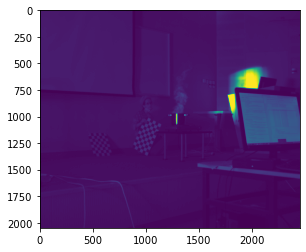

In [29]:
plt.imshow(raw_images[15][2])

KeyboardInterrupt: 

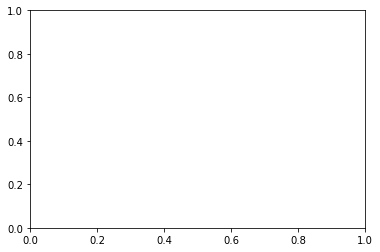

In [40]:
plt.hist(raw_images[0], bins=80, type="histtype")

In [ ]:
im_n = 50
sleep1 = 0.5
sleep2 = sleep1
raw_images = imager.capture_sequence(im_n, sleep1, 0.5)

0 - 2021-10-13 08:40:17.787790 - 101936 captured Mono12Packed image 
0 - 2021-10-13 08:40:17.880247 - 101934 captured Mono12Packed image 
1 - 2021-10-13 08:40:18.458175 - 101936 captured Mono12Packed image 
1 - 2021-10-13 08:40:18.541759 - 101934 captured Mono12Packed image 
2 - 2021-10-13 08:40:19.137293 - 101936 captured Mono12Packed image 
2 - 2021-10-13 08:40:19.226176 - 101934 captured Mono12Packed image 
3 - 2021-10-13 08:40:19.813243 - 101936 captured Mono12Packed image 
3 - 2021-10-13 08:40:19.927136 - 101934 captured Mono12Packed image 
4 - 2021-10-13 08:40:20.537167 - 101936 captured Mono12Packed image 
4 - 2021-10-13 08:40:20.625676 - 101934 captured Mono12Packed image 
5 - 2021-10-13 08:40:21.218900 - 101936 captured Mono12Packed image 
5 - 2021-10-13 08:40:21.297367 - 101934 captured Mono12Packed image 
6 - 2021-10-13 08:40:21.877724 - 101936 captured Mono12Packed image 
6 - 2021-10-13 08:40:21.949670 - 101934 captured Mono12Packed image 
7 - 2021-10-13 08:40:22.581781 - 1

In [ ]:
init_image = imager.capture_sequence(1, 0,0)
init_image = np.squeeze(np.array(init_image[0]))
for im in init_image:
    plt.imshow(im)
    plt.show()
init_image.shape